In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

C:\Users\Vagdevi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv(r"C:\Users\Vagdevi\OneDrive\Desktop\Customer Churn Analysis & Prediction\Telco_Customer_Churn_Dataset  (3).csv")


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#checking for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#dropping the missing values
df = df.dropna()

In [10]:
#identify categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

In [11]:
#converting categorical data into numerical data
label_encoders = {}
for cols in categorical_cols:
    label_encoders[cols] = LabelEncoder()
    df[cols] = label_encoders[cols].fit_transform(df[cols])

In [12]:
#Exploratory Data Analysis

In [13]:
#calculating churn rate
churn_rate = df['Churn'].mean()
print(f'Overall Churn Rate: {churn_rate:.2f}')


Overall Churn Rate: 0.27


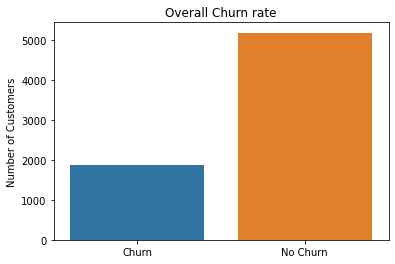

In [14]:
#visualising churn rate

plt.figure(figsize = (6,4))
sns.barplot(x=['Churn','No Churn'], y =[df['Churn'].sum(),len(df)-df['Churn'].sum()])
plt.title('Overall Churn rate')
plt.ylabel('Number of Customers')
plt.show()

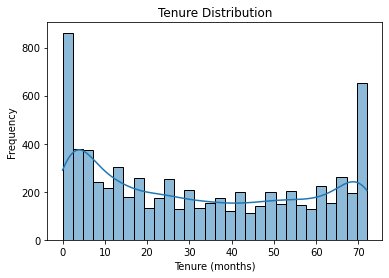

In [15]:
# visualise tenure distribution
plt.figure(figsize = (6,4))
sns.histplot(df['tenure'],bins = 30, kde = True)
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

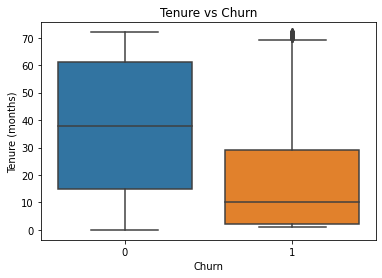

In [16]:
# Visualize tenure vs churn
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Churn'], y=df['tenure'])
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()

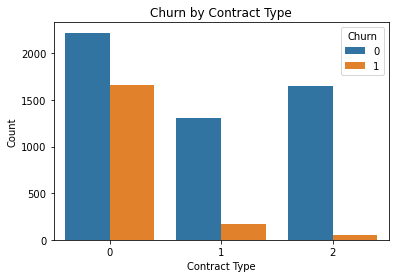

In [17]:
# Visualize contract type vs churn
plt.figure(figsize=(6,4))
sns.countplot(x=df['Contract'], hue=df['Churn'])
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

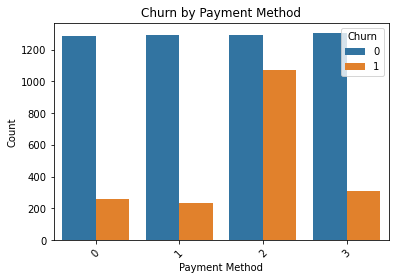

In [18]:
# Visualize payment method vs churn
plt.figure(figsize=(6,4))
sns.countplot(x=df['PaymentMethod'], hue=df['Churn'])
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


NaNs Values:
 tenure            0
MonthlyCharges    0
Contract          0
dtype: int64

Final DataFrame shape: (7043, 3)
tenure              int64
MonthlyCharges    float64
Contract            int32
dtype: object
Cluster
0    0.149493
1    0.155475
2    0.476384
Name: Churn, dtype: float64


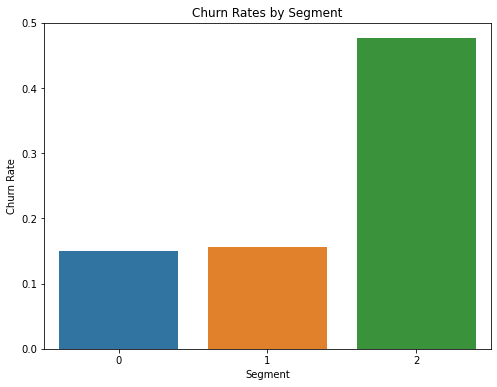

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
13           174       1              0        0           0      49   
26          4584       1              0        1           1      47   
38          3828       1              0        0           0      34   
104         2233       1              0        1           0      68   
110          327       1              0        1           0      55   
...          ...     ...            ...      ...         ...     ...   
6952        4538       0              0        0           0      48   
6972        4733       0              1        0           0      56   
6986        2793       0              0        1           0      30   
7006          53       1              0        0           0      40   
7034         437       0              0        0           0      67   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
13               1              2                1          

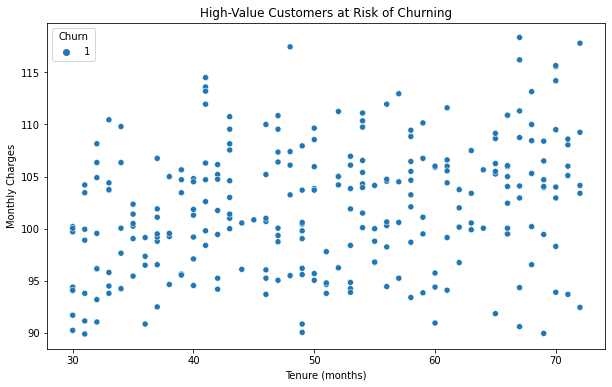

In [19]:

segment_data = df[['tenure', 'MonthlyCharges', 'Contract']].copy()

# Filling NaN values in tenure and MonthlyCharges
# segment_data['tenure'].fillna(segment_data['tenure'].median(), inplace=True)
# segment_data['MonthlyCharges'].fillna(segment_data['MonthlyCharges'].median(), inplace=True)

# # Replace infinite values
# segment_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Checking for NaNs
print("\nNaNs Values:\n", segment_data.isnull().sum())

# Drop rows with NaNs (if any remain)
# segment_data.dropna(inplace=True)

# Final check on DataFrame
print("\nFinal DataFrame shape:", segment_data.shape)

# Raise error if empty
if segment_data.empty:
    raise ValueError("The segment_data DataFrame is empty after handling NaN and infinite values.")

# Ensure all values are numeric before applying KMeans
print(segment_data.dtypes)
if not all(segment_data.dtypes.apply(lambda x: np.issubdtype(x, np.number))):
    raise ValueError("All columns in segment_data must be numeric.")

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
segment_data['Cluster'] = kmeans.fit_predict(segment_data)

# Add cluster labels to the original dataset
df.loc[segment_data.index, 'Cluster'] = segment_data['Cluster']

# Analyze Churn Rates Within Segments
churn_rate_by_segment = df.groupby('Cluster')['Churn'].mean()
print(churn_rate_by_segment)

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate_by_segment.index, y=churn_rate_by_segment.values)
plt.title('Churn Rates by Segment')
plt.xlabel('Segment')
plt.ylabel('Churn Rate')
plt.show()

# Identify High-Value Customers at Risk of Churning
high_value_customers = df[(df['MonthlyCharges'] > df['MonthlyCharges'].quantile(0.75)) & 
                            (df['tenure'] > df['tenure'].median())]

high_value_at_risk = high_value_customers[high_value_customers['Churn'] == 1]
print(high_value_at_risk)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=high_value_at_risk)
plt.title('High-Value Customers at Risk of Churning')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.show()


In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [21]:
# Prepare data for modeling
features = ['tenure', 'MonthlyCharges', 'Contract', 'Cluster']  # Including 'Cluster' as a feature
X = df[features]
y = df['Churn']

In [22]:
# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, columns=['Contract', 'Cluster'], drop_first=True)

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [25]:
# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("\nBest Parameters for Random Forest:", grid_search.best_params_)
print("Best Score for Random Forest:", grid_search.best_score_)

# Evaluate best Random Forest model on test set
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\nOptimized Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Performance:
Accuracy: 0.7941
Precision: 0.6675
Recall: 0.4826
F1 Score: 0.5602

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.67      0.48      0.56       574

    accuracy                           0.79      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113


Decision Tree Performance:
Accuracy: 0.7378
Precision: 0.5182
Recall: 0.4948
F1 Score: 0.5062

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1539
           1       0.52      0.49      0.51       574

    accuracy                           0.74      2113
   macro avg       0.67      0.66      0.66      2113
weighted avg       0.73      0.74      0.74      2113


Random Forest Performance:
Accuracy: 0.7662
Precision: 0.5837
Recall: 0.4861
F1 Score: 0.5304

Clas

In [26]:
from sklearn.metrics import roc_curve, auc

In [27]:
best_model = best_rf

In [28]:
# Predict probabilities for the test set
y_prob = best_model.predict_proba(X_test)[:, 1]

In [29]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [30]:
print(f"\nAUC for the best Random Forest model: {roc_auc:.4f}")


AUC for the best Random Forest model: 0.8347


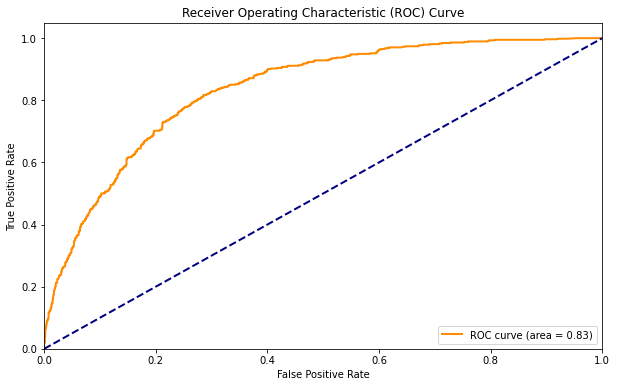

In [31]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [32]:
# Interpret model coefficients or feature importances
if hasattr(best_model, 'coef_'):
    # For Logistic Regression
    feature_importances = pd.Series(best_model.coef_[0], index=X.columns).sort_values(ascending=False)
    print("\nLogistic Regression Coefficients:\n", feature_importances)
elif hasattr(best_model, 'feature_importances_'):
    # For Random Forest
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("\nRandom Forest Feature Importances:\n", feature_importances)


Random Forest Feature Importances:
 MonthlyCharges    0.400277
tenure            0.311598
Cluster_2         0.124778
Contract_2        0.086703
Contract_1        0.063078
Cluster_1         0.013565
dtype: float64


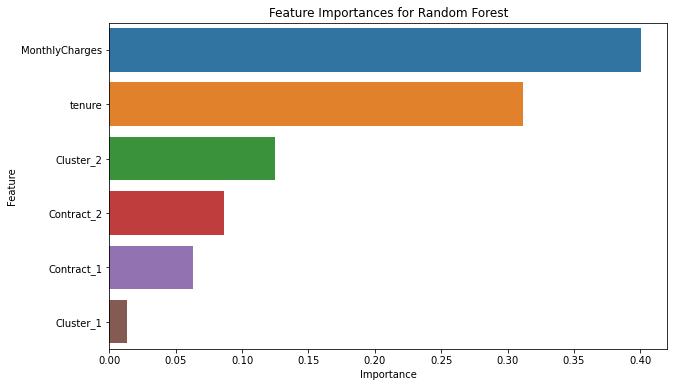

In [33]:
# Additional analysis: Display feature importances for Random Forest
if hasattr(best_model, 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.title('Feature Importances for Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()